In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('GS.csv')

In [3]:
data.head(10)

,Unnamed: 0,open,high,low,close,volume
0,2006-01-03,126.70,129.44,124.23,128.87,6188700
1,2006-01-04,127.35,128.91,126.38,127.09,4861600
2,2006-01-05,126.00,127.32,125.61,127.04,3717400
3,2006-01-06,127.29,129.25,127.29,128.84,4319600
4,2006-01-09,128.50,130.62,128.00,130.39,4723500
5,2006-01-10,130.05,132.95,130.02,132.03,5536800
6,2006-01-11,131.45,133.80,131.42,131.97,4671400
7,2006-01-12,131.40,133.21,131.38,132.25,3725500
8,2006-01-13,132.02,133.66,131.90,133.26,2894900
9,2006-01-17,131.00,133.13,130.59,132.59,3621600


In [4]:
data.ndim

2

In [5]:
data.dtypes

Unnamed: 0     object
open          float64
high          float64
low           float64
close         float64
volume          int64
dtype: object

In [6]:
data.describe()

,open,high,low,close,volume
count,3271.000000,3271.000000,3271.000000,3271.000000,3.271000e+03
mean,170.809054,172.782860,168.783986,170.789993,6.876017e+06
std,42.499712,42.547848,42.416509,42.435627,7.484912e+06
min,54.000000,54.540000,47.410000,52.000000,6.977000e+05
25%,147.525000,149.055000,145.440000,147.200000,2.936859e+06
50%,166.550000,168.000000,164.850000,166.470000,4.460600e+06
75%,199.060000,201.230000,197.125000,199.250000,7.811750e+06
max,274.340000,275.310000,270.770000,273.380000,1.145907e+08


In [7]:
data.corr()

,open,high,low,close,volume
open,1.000000,0.999008,0.998559,0.997779,-0.336978
high,0.999008,1.000000,0.998011,0.998835,-0.320414
low,0.998559,0.998011,1.000000,0.998855,-0.363616
close,0.997779,0.998835,0.998855,1.000000,-0.341085
volume,-0.336978,-0.320414,-0.363616,-0.341085,1.000000


In [8]:
data.shape

(3271, 6)

In [9]:
data['volume'].unique

<bound method Series.unique of 0       6188700
1       4861600
2       3717400
3       4319600
4       4723500
5       5536800
6       4671400
7       3725500
8       2894900
9       3621600
10      4302700
11      5010700
12      5679900
13      3847900
14      3758000
15      3740500
16      4808200
17      3687900
18      3168600
19      4906200
20      3635900
21      3711000
22      4178900
23      3849300
24      5207700
25      4481400
26      3059500
27      4433100
28      2155200
29      3003100
         ...   
3241    4260001
3242    2829572
3243    3419116
3244    5513841
3245    4111653
3246    1862633
3247    3143267
3248    2345380
3249    3762873
3250    2666117
3251    6219958
3252    4015619
3253    5797535
3254    5275511
3255    3921232
3256    4528341
3257    4713871
3258    3677292
3259    4008550
3260    5078341
3261    8395805
3262    5150789
3263    5316095
3264    6488177
3265    8960030
3266    3783497
3267    7054656
3268    4972964
3269    4110520
3270    4

In [10]:
data['volume'].values

array([6188700, 4861600, 3717400, ..., 4972964, 4110520, 4550009],
      dtype=int64)

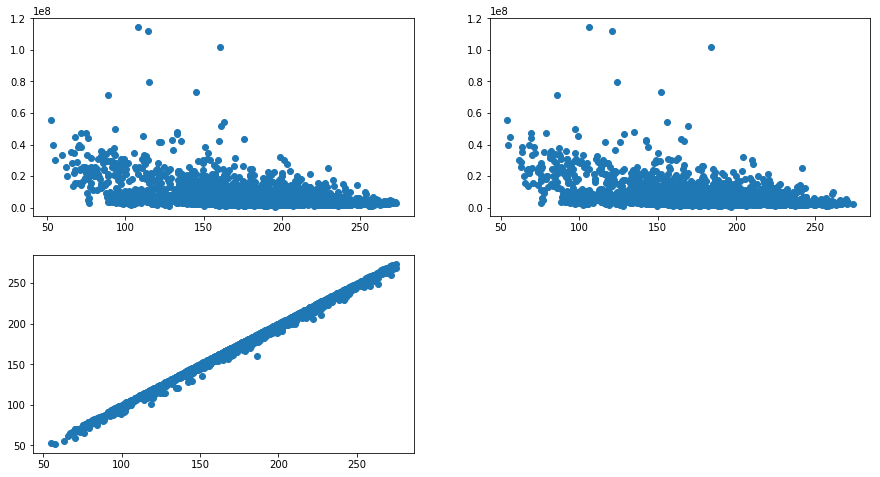

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(data['close'].values, data['volume'].values)

plt.subplot(2,2,2)
plt.scatter(data['open'].values, data['volume'].values)

plt.subplot(2,2,3)
plt.scatter(data['high'].values, data['close'].values)
plt.show()

In [12]:
import seaborn as sns

<Figure size 1080x576 with 0 Axes>

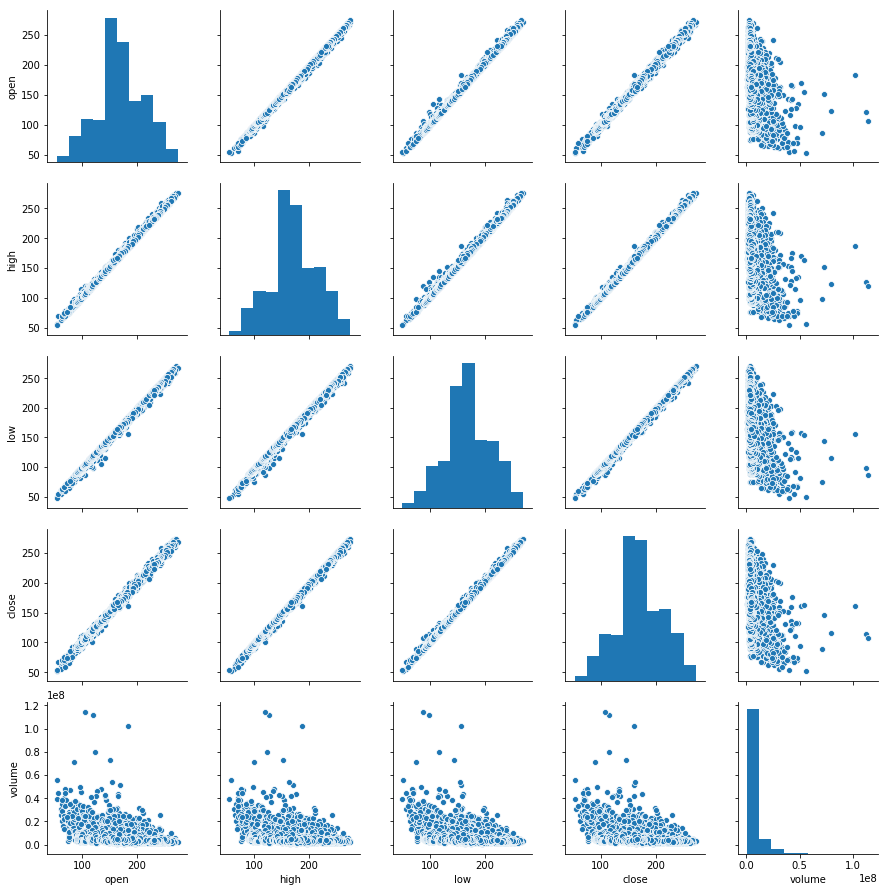

In [13]:
plt.figure(figsize=(15,8))
sns.pairplot(data)

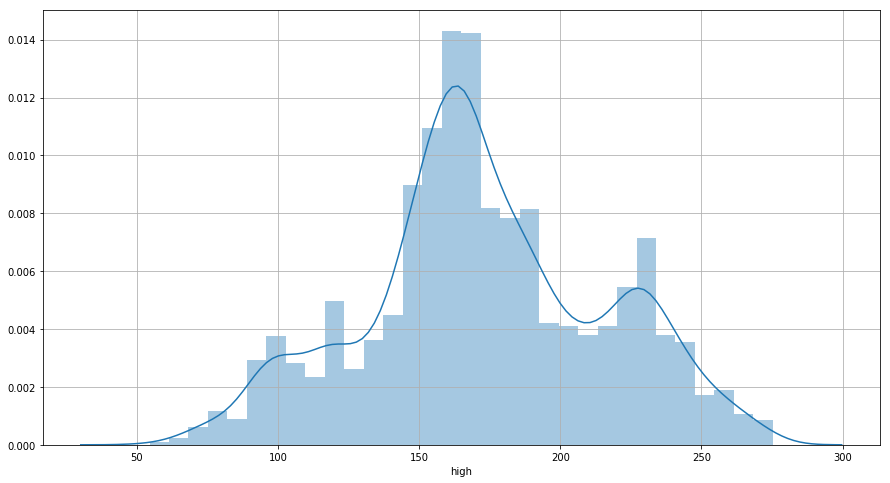

In [14]:
plt.figure(figsize=(15,8))
sns.distplot(data['high'])
plt.grid()
plt.show()

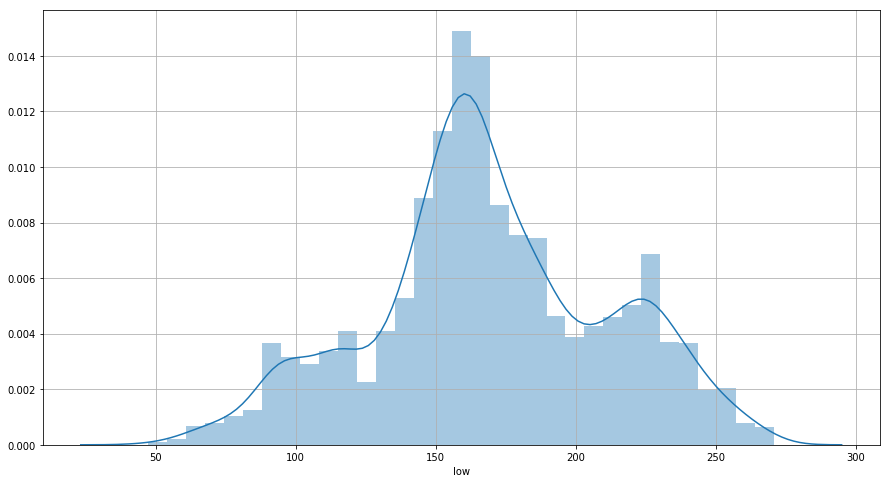

In [15]:
plt.figure(figsize=(15,8))
sns.distplot(data['low'])
plt.grid()
plt.show()

In [16]:
open=data.iloc[: ,1:2].values
close=data.iloc[:,-1].values

In [17]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()

In [18]:
lr1.fit(open,close) # lr is linear regression at point 6.5
print(lr1.predict([[6.5]])) 

[16627335.86638134]


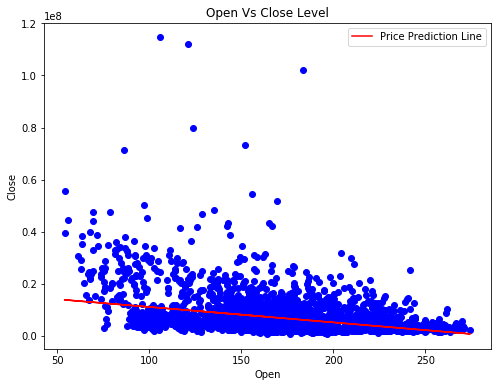

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(open, close, color='blue')
plt.plot(open,lr1.predict(open),color='red',label='Price Prediction Line')
plt.title('Open Vs Close Level')
plt.xlabel('Open')
plt.ylabel('Close')
plt.legend() # it show which line indicate which graph
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
pr2=PolynomialFeatures(degree=2)
open_poly2=pr2.fit_transform(open)
open_poly2

array([[1.00000000e+00, 1.26700000e+02, 1.60528900e+04],
       [1.00000000e+00, 1.27350000e+02, 1.62180225e+04],
       [1.00000000e+00, 1.26000000e+02, 1.58760000e+04],
       ...,
       [1.00000000e+00, 1.60120000e+02, 2.56384144e+04],
       [1.00000000e+00, 1.65640000e+02, 2.74366096e+04],
       [1.00000000e+00, 1.63780000e+02, 2.68238884e+04]])

In [21]:
lr2=LinearRegression()
lr2.fit(open_poly2,close)
print(lr2.predict(pr2.fit_transform([[6.5]])))
print(lr2.score(open_poly2,close))

[32163739.00236385]
0.15002679446599776


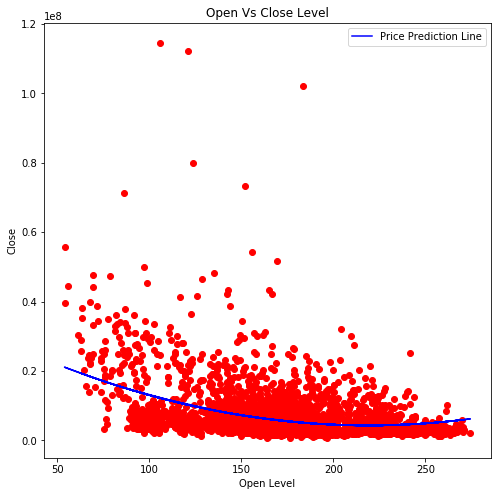

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(open, close, color='red')
plt.plot(open,lr2.predict(open_poly2),color='blue',label='Price Prediction Line')
plt.title('Open Vs Close Level')
plt.xlabel('Open Level')
plt.ylabel('Close')
plt.legend() 
plt.show()

In [23]:
pr5=PolynomialFeatures(degree=4)
open_poly5=pr5.fit_transform(open)

lr5=LinearRegression()
lr5.fit(open_poly5,close)
print(lr5.predict(pr5.fit_transform([[6.5]])))
print(lr5.score(open_poly5,close))

[1.17255555e+08]
0.1846187074547606


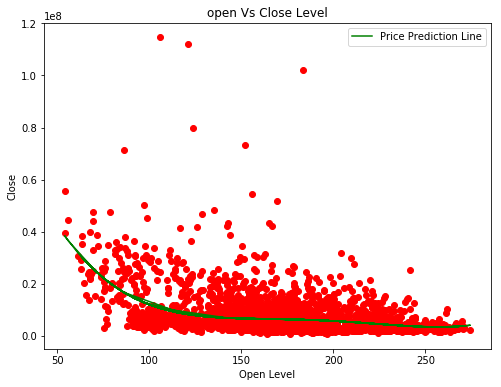

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(open, close, color='red')
plt.plot(open,lr5.predict(open_poly5),color='green',label='Price Prediction Line')
plt.title('open Vs Close Level')
plt.xlabel('Open Level')
plt.ylabel('Close')
plt.legend()
plt.show()

In [25]:
pr10=PolynomialFeatures(degree=10)
open_poly10=pr10.fit_transform(open)

lr10=LinearRegression()
lr10.fit(open_poly10,close)
print(lr10.predict(pr10.fit_transform([[6.5]])))
print(lr10.score(open_poly10,close))

[19156592.48905531]
0.15178131971531184


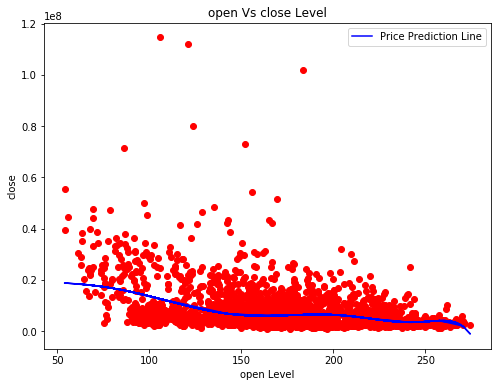

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(open, close, color='red')
plt.plot(open,lr10.predict(open_poly10),color='blue',label='Price Prediction Line')
plt.title('open Vs close Level')
plt.xlabel('open Level')
plt.ylabel('close')
plt.legend() # it show which line indicate which graph
plt.show()

#### Thus our predicted line is less accurate so we have intrested in more precise line.

In [27]:
pr20=PolynomialFeatures(degree=20)
open_poly20=pr20.fit_transform(open)

lr20=LinearRegression()
lr20.fit(open_poly20,close)
print(lr20.predict(pr20.fit_transform([[6.5]])))
print(lr20.score(open_poly20,close))

[9248188.94280825]
0.06656688501321129


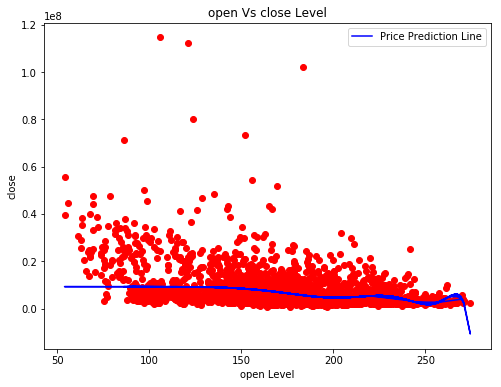

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(open, close, color='red')
plt.plot(open,lr20.predict(open_poly20),color='blue',label='Price Prediction Line')
plt.title('open Vs close Level')
plt.xlabel('open Level')
plt.ylabel('close')
plt.legend() # it show which line indicate which graph
plt.show()

In [29]:
pr15=PolynomialFeatures(degree=15)
open_poly15=pr15.fit_transform(open)

lr15=LinearRegression()
lr15.fit(open_poly15,close)
print(lr15.predict(pr15.fit_transform([[10]])))
print(lr15.score(open_poly15,close))

[12093983.90482405]
0.11216024164116102


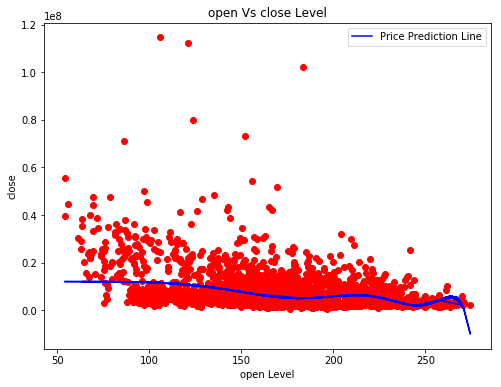

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(open, close, color='red')
plt.plot(open,lr15.predict(open_poly15),color='blue',label='Price Prediction Line')
plt.title('open Vs close Level')
plt.xlabel('open Level')
plt.ylabel('close')
plt.legend() # it show which line indicate which graph
plt.show()

In [31]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1000,random_state=1)

In [32]:
rr.fit(open_poly2,close)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001)

In [33]:
print(rr.score(open_poly2,close))
print(rr.predict(pr2.fit_transform([[6.5]])))

0.15002412665833476
[32025071.31503147]


In [34]:
for i in [0, 1,10,100,1000,1000000]:
    rr = Ridge(alpha=i, random_state=0)
    rr.fit(open_poly2,close)
    print(f'Training score for alpha = {i} is {rr.score(open_poly2,close)}')
    print(f'Prediction of open={rr.predict(pr2.fit_transform([[6.5]]))}')
    print()

Training score for alpha = 0 is 0.15002679446599776
Prediction of open=[32163739.00236184]

Training score for alpha = 1 is 0.1500267944632936
Prediction of open=[32163599.39236906]

Training score for alpha = 10 is 0.15002679419561193
Prediction of open=[32162342.9878853]

Training score for alpha = 100 is 0.1500267674604956
Prediction of open=[32149787.39824706]

Training score for alpha = 1000 is 0.15002412665833476
Prediction of open=[32025071.31503147]

Training score for alpha = 1000000 is 0.10560463196866433
Prediction of open=[14270127.44746571]



*after tradeoff point predicted salary again gradually increases

In [35]:
from sklearn.linear_model import Lasso
ls= Lasso(alpha = 10000.0,random_state=0)
ls.fit(open_poly2,close)

Lasso(alpha=10000.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
print(ls.score(open_poly2,close))
print(ls.predict(pr2.fit_transform([[6.5]])))

0.150026753262396
[32146507.24344432]


In [37]:
for i in [0, 1,10,100,1000,1000000]:
    ls = Lasso(alpha=i, random_state=0)
    ls.fit(open_poly2,close)
    print(f'Training score for alpha = {i} is {ls.score(open_poly2,close)}')
    print(f'Prediction of open={ls.predict(pr2.fit_transform([[6.5]]))}')
    print()

Training score for alpha = 0 is 0.15002679446599776
Prediction of open=[32163739.00217774]

Training score for alpha = 1 is 0.15002679446599743
Prediction of open=[32163737.27954692]

Training score for alpha = 10 is 0.15002679446595668
Prediction of open=[32163721.77650099]

Training score for alpha = 100 is 0.1500267944618784
Prediction of open=[32163566.7014795]

Training score for alpha = 1000 is 0.15002679405415376
Prediction of open=[32162016.22788784]

Training score for alpha = 1000000 is 0.14961475664118196
Prediction of open=[30440559.33241266]



C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
